In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
print(sys.path)

['C:\\Users\\alexander.paskal\\projects\\news-bias-analysis\\notebooks', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\python38.zip', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\DLLs', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\lib', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis', '', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\lib\\site-packages', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\lib\\site-packages\\huggingface_hub-0.0.8-py3.8.egg', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\lib\\site-packages\\win32', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\lib\\site-packages\\win32\\lib', 'C:\\Users\\alexander.paskal\\Anaconda3\\envs\\news-bias-analysis\\lib\\site-packages\\Pythonwin', 'C:\\Users\

In [98]:
from data.nela2017 import Nela2017
from utils.text.preprocess import preprocess, STOPWORDS
from utils.plotting.plotting import wordcloud
from collections import Counter, defaultdict
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
ROOT = "C:/Users/alexander.paskal/datasets/NELA2017"
nela = Nela2017(ROOT)

# Whole dataset
- number of articles
- avg length of article
- bar chart of article frequencies per day
- title wordcloud
- top 10 most represented organizations - count barchart 
- overlayed barchart of article frequency over time
- overlayed barchart of article frequency weekly counts

# Fox and CNN
- Article Count barchart
- Title wordcloud
- Top authors barchart



In [5]:
# extract articles, takes about 20-25 seconds on my computer
articles = nela.list()

In [136]:
for word in ["first", "says", "said", "new"]:
    STOPWORDS.add(word)

In [8]:
# Whole dataset number of articles, takes about 30-60 seconds
number_articles = len(articles)

avg_title_length = sum([len(article.title) for article in articles]) / number_articles
avg_article_length = sum([os.path.getsize(article.path) for article in articles]) / number_articles

print("number of articles:", number_articles)
print("average article length:", avg_article_length)
print("average title length:", avg_title_length)


number of articles: 135599
average article length: 149002.65821281867
average title length: 65.3068827941209


Text(0, 0.5, 'Number of Articles')

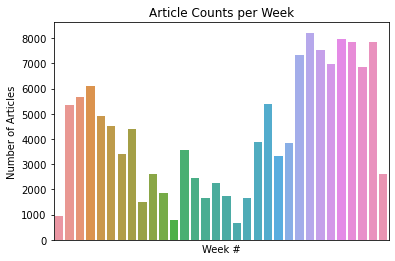

In [36]:
# bar chart of article frequencies per week

c = Counter(map(lambda x: x.date.isocalendar()[1], articles))

counts = list(c.values())
names = list(c.keys())
bar = sns.barplot(x=names, y=counts)
bar.set_title("Article Counts per Week")
bar.get_xaxis().set_ticks([])
bar.set_xlabel("Week #")
bar.set_ylabel("Number of Articles")

Text(0, 0.5, 'Number of Articles')

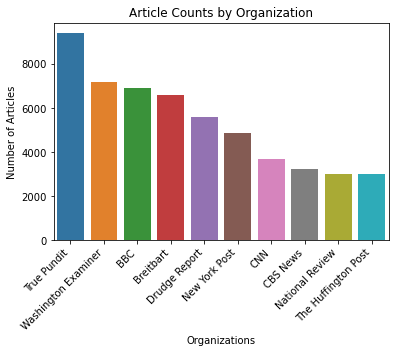

In [80]:
# bar chart of top organizations

c = Counter(map(lambda x: x.org, articles))

NUM_ARTS = 10
counts = [thing[1] for thing in c.most_common()[:NUM_ARTS]]
names = [thing[0] for thing in c.most_common()[:NUM_ARTS]]
bar = sns.barplot(x=names, y=counts)
bar.set_title("Article Counts by Organization")
bar.set_xticklabels(names, rotation=45, ha="right")
bar.set_xlabel("Organizations")
bar.set_ylabel("Number of Articles")

[]

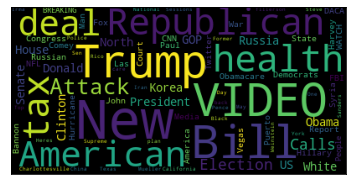

In [77]:
# title wordclouds, takes about a minute
title_words = []
for article in articles:
    title_words.extend(preprocess(article.title))

c = Counter(title_words)

words = Counter({k: v for k, v in c.items() if k.lower() not in STOPWORDS})
words = [count[0] for count in words.most_common()[:100]]

fig, ax = plt.subplots()
wordcloud(" ".join(words), ax=ax)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

AttributeError: 'list' object has no attribute 'get'

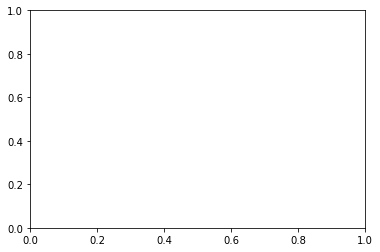

In [88]:
# Show comparisons of article counts per month for each organization to see if they covary strongly

NUM_ARTS = 6


c = Counter(map(lambda x: x.org, articles))
orgs = [thing[0] for thing in c.most_common()[:NUM_ARTS]]

# fig, axs = plt.subplots(2, NUM_ARTS // 2)
fig, ax = plt.subplots()

# for ax, org in zip(orgs, axs.flat):
counts = []
for org in orgs:
    org_articles = filter(lambda x: x.org == org, articles)
    org_c = Counter(map(lambda x: x.date.isocalendar()[1], org_articles))

    counts.append(list(org_c.values()))

names = list(org_c.keys())
bar = sns.barplot(x=names, y="Article Counts", data=counts, ax=ax)
bar.set_title(f"{org} Article Counts per Week")
bar.get_xaxis().set_ticks([])
bar.set_xlabel("Week #")
bar.set_ylabel("Number of Articles")

plt.show()


In [89]:
# Fox and CNN articles

nela.organizations("FOX NEWS")
fox_articles = nela.list()

nela.organizations("CNN")
cnn_articles = nela.list()

31 31


([], [])

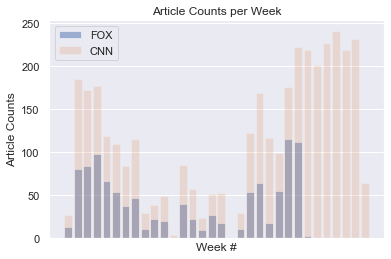

In [133]:
# bar chart of article frequencies per week
c = Counter(map(lambda x: x.date.isocalendar()[1], cnn_articles))
cnn_counts = list(c.values())

dates = list(c.keys())

c = Counter(map(lambda x: x.date.isocalendar()[1], fox_articles))

fox_counts = [0 if c.get(date) is None else c.get(date) for date in dates]


print(len(fox_counts), len(cnn_counts))

# bar = sns.barplot(x=names, y=counts)
sns.set_theme()
plt.bar(dates, fox_counts, alpha=0.5)
plt.bar(dates, cnn_counts, alpha=0.2)
plt.legend(["FOX", "CNN"])
plt.title("Article Counts per Week")
plt.xlabel("Week #")
plt.ylabel("Article Counts")
plt.xticks([])

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

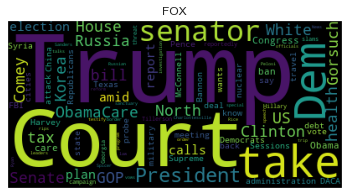

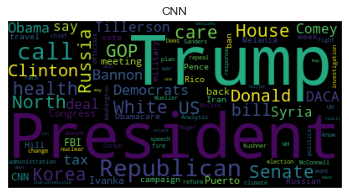

In [143]:
# title wordclouds, takes about a minute
title_words = []
for article in fox_articles:
    title_words.extend(preprocess(article.title))
c = Counter(title_words)
words = Counter({k: v for k, v in c.items() if k.lower() not in STOPWORDS})
fox_words = [count[0] for count in words.most_common()[:100]]


title_words = []
for article in cnn_articles:
    title_words.extend(preprocess(article.title))
c = Counter(title_words)
words = Counter({k: v for k, v in c.items() if k.lower() not in STOPWORDS})
cnn_words = [count[0] for count in words.most_common()[:100]]


ax = plt.axes()
wordcloud(" ".join(fox_words), ax=ax)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_title("FOX")
plt.show()
ax = plt.axes()
wordcloud(" ".join(cnn_words), ax=ax)
plt.xticks([])
plt.yticks([])
plt.title("CNN")

plt.show()

In [152]:
# takes about 15 seconds, as now we're actually reading the info

fox_authors = Counter(map(lambda x: x.author, fox_articles))
fox_authors.pop('')

cnn_authors = Counter(map(lambda x: x.author, cnn_articles))

Text(0, 0.5, 'Number of Articles')

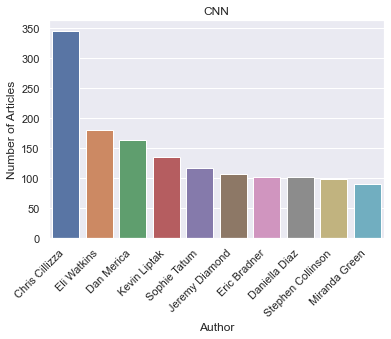

In [171]:

fox_names = [i[0] for i in fox_authors.most_common()[:10]]
fox_counts = [i[1] for i in fox_authors.most_common()[:10]]


cnn_names = [i[0] for i in cnn_authors.most_common()[:10]]
cnn_counts = [i[1] for i in cnn_authors.most_common()[:10]]

# fig, axs = plt.subplots(2)

# ax = axs[0]

# ax = axs[1]
counts = cnn_counts
names = cnn_names
title = "CNN"

bar = sns.barplot(x=names, y=counts)
bar.set_title(title)
bar.set_xticklabels(names, rotation=45, ha="right")
bar.set_xlabel("Author")
bar.set_ylabel("Number of Articles")



Text(0, 0.5, 'Number of Articles')

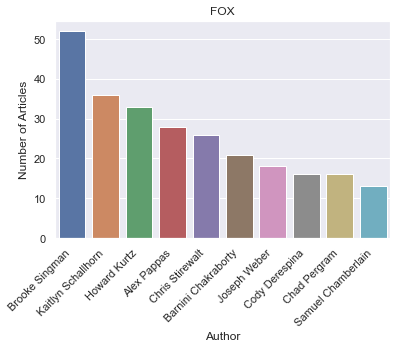

In [172]:
counts = fox_counts
names = fox_names
title = "FOX"

bar = sns.barplot(x=names, y=counts)
bar.set_title(title)
bar.set_xticklabels(names, rotation=45, ha="right")
bar.set_xlabel("Author")
bar.set_ylabel("Number of Articles")


In [168]:
fox_counts

[52, 36, 33, 28, 26, 21, 18, 16, 16, 13]